#### Imports

In [1]:
import os
import sys
# Add project root (one level up from data_analysis) to sys.path
sys.path.append(os.path.abspath('..'))
from importlib import reload

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

from helper.normalizer import normalize
import config
reload(config)


<module 'config' from '/home/sebastian/OneDrive/Dokumente/FernUni/Komplexe Netze/Code/config.py'>

#### Einlesen der Daten und Aufteilen in Training- und Testdaten

In [2]:
df = pd.read_csv('../data/output/output_neu.csv')
df = df[df['stopwords_removed'] == True]
df = df[df['author'] != 'ALL']
df = df[df["link_distance"] == 1]
df = df[df['fixed_token_count'] == 13062]

features = config.FEATURES_USED_BY_CLASSIFIER

df = normalize(df, features)

df_train = df[df['language'] == 'de'] # Trainingsdaten
df_test = df[df['language'] == 'en'] # Testdaten


X_train = df_train[features]
y_train = df_train['author']

X_test = df_test[features]
y_test = df_test['author']

#### Trainieren des Klassifikators und Speichern der Genauigkeitswerte

In [3]:
from sklearn.neighbors import KNeighborsClassifier

decision_tree = DecisionTreeClassifier()
nn_classificator = KNeighborsClassifier(n_neighbors=5)


classifier = decision_tree

accuracy_score_list = []

# Um Zufallseffekte zu umgehen, bilden wir den Durchschnitt der Genauigkeit in 100 unterschiedlichen Läufen
for _ in range(100):

    classifier.fit(X_train, y_train)

    y_prediction = classifier.predict(X_test)

    accuracy_score_list.append(accuracy_score(y_test, y_prediction))

print(np.mean(accuracy_score_list))



0.3535294117647058


In [4]:
classifier.fit(X_train, y_train)

y_prediction = classifier.predict(X_test)
df_test['author_predicted'] = y_prediction
print(df_test[['author', 'author_predicted']])

        author author_predicted
71       Hesse            Kafka
74       Hesse        Nietzsche
76       Kafka            Kafka
77       Kafka            Kafka
78      Austen            Kafka
79       Hesse            Hesse
80   Nietzsche            Kafka
83      Austen        Nietzsche
86       Kafka            Kafka
87      Austen            Kafka
88   Nietzsche           Austen
89   Nietzsche            Hesse
91       Hesse            Hesse
96   Nietzsche        Nietzsche
98       Kafka            Kafka
100  Nietzsche            Hesse
101     Austen            Kafka


/tmp/ipykernel_9455/67188276.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['author_predicted'] = y_prediction


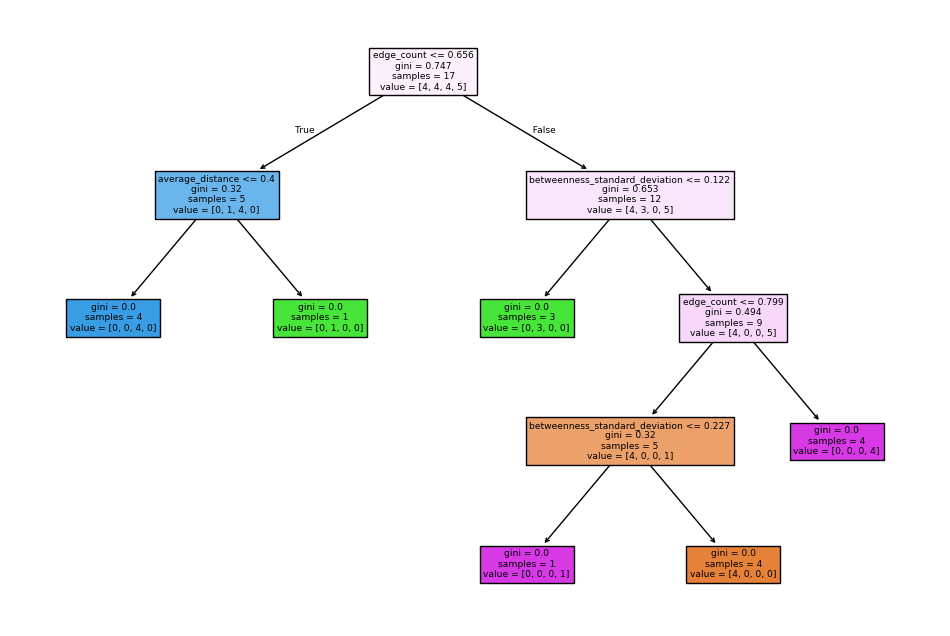

edge_count: 0.481
betweenness_standard_deviation: 0.393
average_distance: 0.126
node_count: 0.000
average_degree: 0.000
median_degree: 0.000
diameter: 0.000
betweenness_average: 0.000
betweenness_min: 0.000
betweenness_max: 0.000
average_clustering: 0.000
powerlaw_alpha_value: 0.000
powerlaw_xmin_value: 0.000


In [5]:
# Darstellung von ChatGPT
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(classifier, feature_names=features, filled=True)
plt.show()

for name, imp in sorted(zip(features, classifier.feature_importances_), key=lambda x: x[1], reverse=True):
    print(f'{name}: {imp:.3f}')